In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('diabetes.tab.txt', sep="\t", header=None)
data.columns = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6','Y']
data = data [1:]
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,1,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,2,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,1,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,1,23,101,192,125.4,52,4,4.2905,80,135


Y mean:  152.13348416289594 
Y median:  140.5 
Y variance:  5929.884896910383


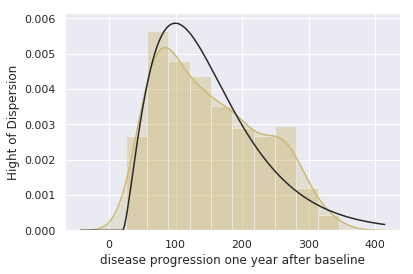

In [3]:
sns.set(color_codes=True)
y = np.array(data.Y.astype(int))
ax = sns.distplot(y, color="y", kde_kws={"shade":True}, fit=stats.gamma)
ax.set(xlabel='disease progression one year after baseline', ylabel='Hight of Dispersion')
print("Y mean: ", y.mean(), "\nY median: ", np.median(y), "\nY variance: ", y.var())

Age mean:  48.51809954751131 
Age median:  50.0 
Age variance:  171.45781720275997


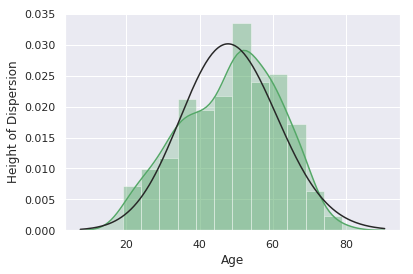

In [4]:
age = np.array(data.AGE.astype(int))
ax = sns.distplot(age, color="g", kde_kws={"shade":True}, fit=stats.gamma)
ax.set(xlabel='Age', ylabel='Height of Dispersion')
print("Age mean: ", age.mean(), "\nAge median: ", np.median(age), "\nAge variance: ", age.var())

BMI mean:  26.37579185520362 
BMI median:  25.7 
BMI variance:  19.47563568518253


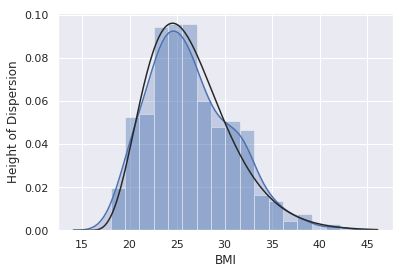

In [5]:
bmi = np.array(data.BMI.astype(float))
ax = sns.distplot(bmi, color="b", kde_kws={"shade":True}, fit=stats.gamma)
ax.set(xlabel="BMI", ylabel="Height of Dispersion")
print("BMI mean: ", bmi.mean(), "\nBMI median: ", np.median(bmi), "\nBMI variance: ", bmi.var())

Blood Pressure mean:  94.64701357466062 
Blood Pressure median:  93.0 
Blood Pressure variance:  190.87158565139944


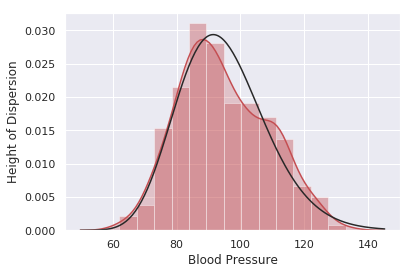

In [6]:
bp = np.array(data.BP.astype(float))
ax = sns.distplot(bp, color="r", kde_kws={"shade":True}, fit=stats.gamma)
ax.set(xlabel="Blood Pressure", ylabel="Height of Dispersion")
print("Blood Pressure mean: ", bp.mean(), "\nBlood Pressure median: ", np.median(bp), "\nBlood Pressure variance: ", bp.var())

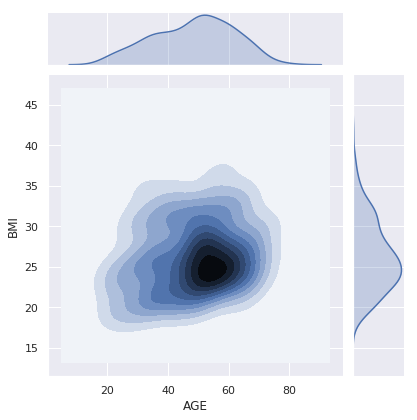

In [7]:
age_bmi = data[["AGE", "BMI"]]
sns.jointplot(x="AGE", y="BMI", data=age_bmi, kind="kde")

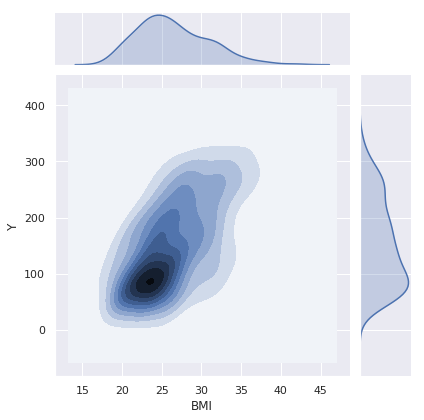

In [8]:
y_bmi = data[["BMI", "Y"]]
sns.jointplot(x="BMI",y="Y",data=y_bmi,kind="kde")

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
poly_reg = PolynomialFeatures(degree=2)
diabetes = datasets.load_diabetes()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


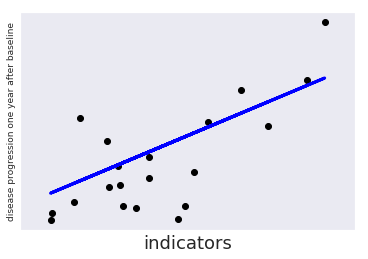

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.ylabel('disease progression one year after baseline', fontsize=9)
plt.xlabel('indicators', fontsize=18)
plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [13]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
boston_regressor = LinearRegression()

In [15]:
boston_train, boston_test, y_train, y_test = train_test_split(poly_reg.fit_transform(df_boston), df_y, test_size=0.33, random_state=5)

In [16]:
boston_regressor.fit(boston_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
boston_regressor.coef_

array([[-2.67057855e-07, -5.33684876e+00,  1.91905866e-01,
        -6.40221332e+00, -1.34060898e+00,  5.44129045e+01,
         1.42370814e+01,  1.23887053e+00, -3.13381099e+00,
         2.75489792e+00,  1.27219182e-01, -1.50843432e+00,
        -4.67759356e-02,  3.76481689e-01,  4.18602522e-03,
         2.78144484e-01,  7.84184796e-01,  1.96510546e+00,
        -8.68708993e-01,  7.02102463e-02, -3.51334179e-03,
         5.24457626e-02,  5.67302049e-01, -5.28099909e-02,
         6.07195009e-01, -5.84077326e-04,  2.82032364e-02,
        -1.07435832e-03, -6.63192868e-03, -1.48803147e-01,
        -1.17715522e+00,  2.61369908e-02, -1.54524546e-04,
        -9.86670900e-03, -3.47264023e-03,  6.87002351e-04,
        -1.56773759e-02,  1.15746231e-03, -8.82995630e-03,
         3.75976385e-02,  1.27723653e-02,  1.00392022e+00,
         3.50154123e-01,  1.33487620e-03,  1.33847500e-01,
        -1.14625768e-02, -1.35078825e-04, -2.49712059e-02,
         7.72096416e-03, -7.72895363e-03, -1.34060895e+0

In [18]:
a = boston_regressor.predict(boston_test)
a[0:5]

array([[42.47162183],
       [27.39540966],
       [24.89346119],
       [ 9.66132138],
       [35.53659039]])

In [19]:
boston_train

array([[1.00000000e+00, 1.11604000e+01, 0.00000000e+00, ...,
        1.20670225e+04, 2.55620950e+03, 5.41492900e+02],
       [1.00000000e+00, 5.66000000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.18295000e+03, 3.02500000e+01],
       [1.00000000e+00, 4.55587000e+00, 0.00000000e+00, ...,
        1.25812090e+05, 2.52546400e+03, 5.06944000e+01],
       ...,
       [1.00000000e+00, 1.78990000e-01, 0.00000000e+00, ...,
        1.54677024e+05, 6.92190400e+03, 3.09760000e+02],
       [1.00000000e+00, 2.29690000e-01, 0.00000000e+00, ...,
        1.55922317e+05, 4.33172390e+03, 1.20340900e+02],
       [1.00000000e+00, 1.06590000e-01, 8.00000000e+01, ...,
        1.41406082e+05, 2.09454280e+03, 3.10249000e+01]])

In [20]:
print(boston_train.shape, y_train.shape)

(339, 105) (339, 1)


In [21]:
np.mean((a-y_test)**2)

0    16.613355
dtype: float64

In [22]:
boston_regressor.score(boston_test, y_test)

0.8227792735764703

Mean squared error: 2548.07
Variance score: 0.82


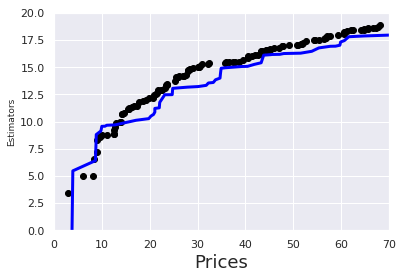

In [23]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, a))

plt.scatter(sorted(boston_train[:,-1], reverse=True), sorted(boston_regressor.predict(boston_train).reshape(-1,1), reverse=True),  color='black')
g = boston_regressor.predict(boston_test)
plt.ylabel('Estimators', fontsize=9)
plt.xlabel('Prices', fontsize=18)
plt.xlim(0,70)
plt.ylim(0,20)
plt.plot(sorted(boston_test[:,-1], reverse=True), sorted(g, reverse = True), color='blue', linewidth=3)

plt.show()